<a href="https://colab.research.google.com/github/Ashvithaa05/Time-Series/blob/main/Time_series_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")



In [ ]:
data = pd.read_csv("/content/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df=data.copy()

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")



In [ ]:
df.head()


,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


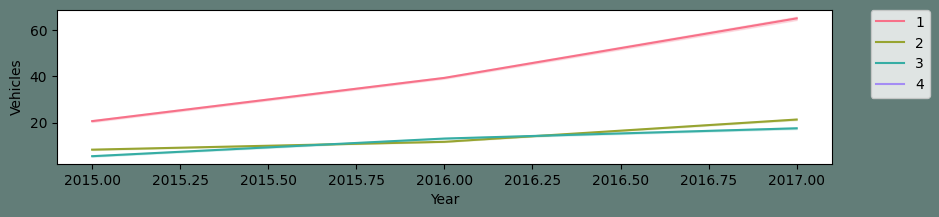

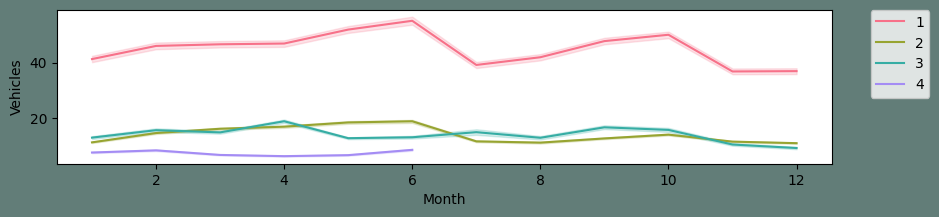

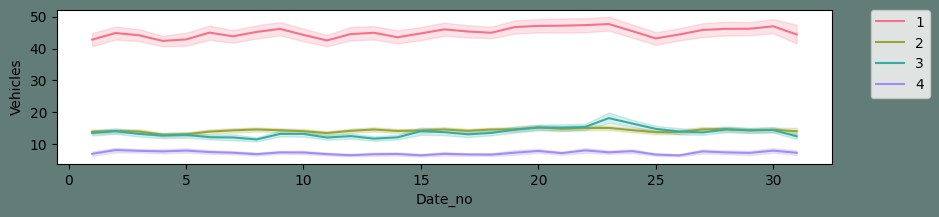

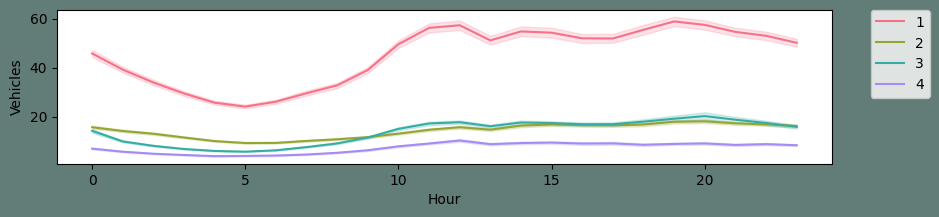

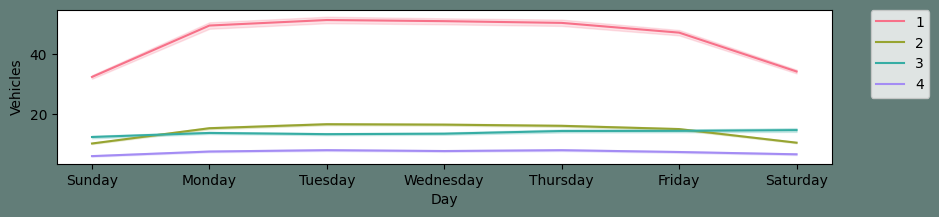

In [ ]:
new_features = ["Year","Month", "Date_no", "Hour", "Day"]

colors = sns.color_palette("husl", 4)

# Now you can use the colors variable in your plotting code
for i in new_features:
    plt.figure(figsize=(10,2), facecolor="#627D78")
    ax = sns.lineplot(x=df[i], y="Vehicles", data=df, hue="Junction", palette=colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

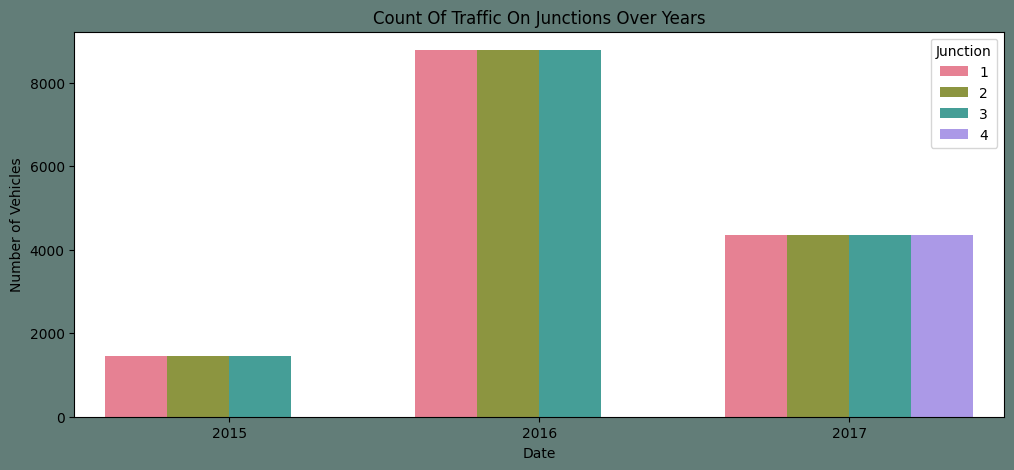

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

<Axes: >

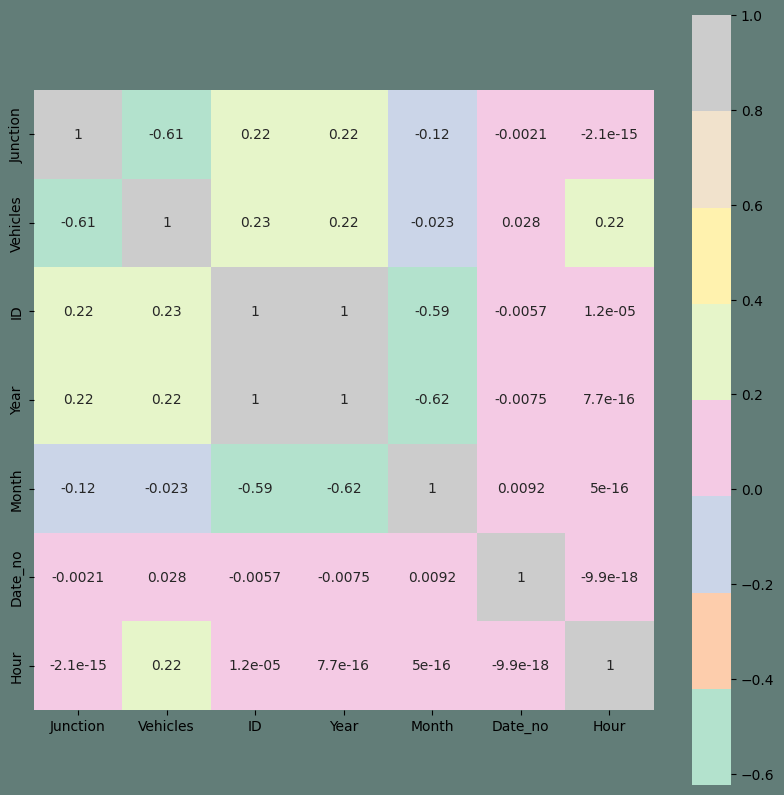

In [ ]:
corrmat = df.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

In [ ]:
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                                     ID  \
Junction             1             2             3            4             1   
count     14592.000000  14592.000000  14592.000000  4344.000000  1.459200e+04   
mean         45.052906     14.253221     13.694010     7.251611  2.016260e+10   
std          23.008345      7.401307     10.436005     3.521455  5.779594e+06   
min           5.000000      1.000000      1.000000     1.000000  2.015110e+10   
25%          27.000000      9.000000      7.000000     5.000000  2.016038e+10   
50%          40.000000     13.000000     11.000000     7.000000  2.016083e+10   
75%          59.000000     17.000000     18.000000     9.000000  2.017013e+10   
max         156.000000     48.000000    180.000000    36.000000  2.017063e+10   

                                                    
Junction             2             3             4  
count     1.459200e+04  1.459200e+04  4.344000e+03  
mean      2.016260e+10  2.016260e+10  2.017037e+10  
std       5.779594e+06  5.779594e+06  1.712987e+05  
min       2.015110e+10  2.015110e+10  2.017010e+10  
25%       2.016038e+10  2.016038e+10  2.017022e+10  
50%       2.016083e+10  2.016083e+10  2.017040e+10  
75%       2.017013e+10  2.017013e+10  2.017052e+10  
max       2.017063e+10  2.017063e+10  2.017063e+10

In [ ]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")


In [ ]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [ ]:
#Normalizing and Differencing to make the series stationary
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

In [ ]:
#Stationary Check for the time series Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")


#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415337
p-value: 4.79853987639816e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.795891026940065
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832316
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.979092563052276
p-value: 2.778787532595421e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [ ]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)

#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)

X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import SGD

def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

    # The GRU model
    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compiling the model with the legacy optimizer
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])
    pred_GRU = model.predict(X_Test)
    return pred_GRU







#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#627D78")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()


In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import SGD

def LSTM_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

    # The LSTM model
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, input_shape=(X_Train.shape[1], 1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compiling the model with the legacy optimizer
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    model.fit(X_Train, y_Train, epochs=50, batch_size=150, callbacks=[early_stopping])
    pred_LSTM = model.predict(X_Test)
    return pred_LSTM


In [ ]:
PredJ1 = LSTM_model(X_trainJ1,y_trainJ1,X_testJ1)
PredJ11 = GRU_model(X_trainJ1,y_trainJ1,X_testJ1)

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 0.0929

87/87 [==============================] - 49s 450ms/step - loss: 0.0929
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 0.0835

87/87 [==============================] - 39s 453ms/step - loss: 0.0835
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 0.0828

87/87 [==============================] - 42s 481ms/step - loss: 0.0828
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 0.0815

87/87 [==============================] - 39s 454ms/step - loss: 0.0815
Epoch 5/50
87/87 [==============================] - ETA: 0s - loss: 0.0818

87/87 [==============================] - 40s 457ms/step - loss: 0.0818
Epoch 6/50
87/87 [==============================] - ETA: 0s - loss: 0.0803

87/87 [==============================] - 40s 457ms/step - loss: 0.0803
Epoch 7/50
87/87 [==============================] - ETA: 0s - loss: 0.0795

87/87 [==============================] - 40s 456ms/step - loss: 0.0795
Epoch 8/50
87/87 [==============================] - ETA: 0s - loss: 0.0791

87/87 [==============================] - 41s 470ms/step - loss: 0.0791
Epoch 9/50
87/87 [==============================] - ETA: 0s - loss: 0.0790

87/87 [==============================] - 40s 460ms/step - loss: 0.0790
Epoch 10/50
87/87 [==============================] - ETA: 0s - loss: 0.0781

87/87 [==============================] - 41s 471ms/step - loss: 0.0781
Epoch 11/50
87/87 [==============================] - ETA: 0s - loss: 0.0779

87/87 [==============================] - 40s 465ms/step - loss: 0.0779
Epoch 12/50
87/87 [==============================] - ETA: 0s - loss: 0.0775

87/87 [==============================] - 40s 462ms/step - loss: 0.0775
Epoch 13/50
87/87 [==============================] - ETA: 0s - loss: 0.0766

87/87 [==============================] - 41s 472ms/step - loss: 0.0766
Epoch 14/50
87/87 [==============================] - ETA: 0s - loss: 0.0765

87/87 [==============================] - 40s 464ms/step - loss: 0.0765
Epoch 15/50
87/87 [==============================] - ETA: 0s - loss: 0.0760

87/87 [==============================] - 41s 467ms/step - loss: 0.0760
Epoch 16/50
87/87 [==============================] - ETA: 0s - loss: 0.0765

87/87 [==============================] - 42s 475ms/step - loss: 0.0765
Epoch 17/50
87/87 [==============================] - ETA: 0s - loss: 0.0750

87/87 [==============================] - 41s 469ms/step - loss: 0.0750
Epoch 18/50
87/87 [==============================] - ETA: 0s - loss: 0.0752

87/87 [==============================] - 42s 482ms/step - loss: 0.0752
Epoch 19/50
87/87 [==============================] - ETA: 0s - loss: 0.0748

87/87 [==============================] - 40s 461ms/step - loss: 0.0748
Epoch 20/50
87/87 [==============================] - ETA: 0s - loss: 0.0743

87/87 [==============================] - 40s 465ms/step - loss: 0.0743
Epoch 21/50
87/87 [==============================] - ETA: 0s - loss: 0.0733

87/87 [==============================] - 41s 468ms/step - loss: 0.0733
Epoch 22/50
87/87 [==============================] - ETA: 0s - loss: 0.0733

87/87 [==============================] - 40s 458ms/step - loss: 0.0733
Epoch 23/50
87/87 [==============================] - ETA: 0s - loss: 0.0724

87/87 [==============================] - 42s 480ms/step - loss: 0.0724
Epoch 24/50
87/87 [==============================] - ETA: 0s - loss: 0.0720

87/87 [==============================] - 40s 462ms/step - loss: 0.0720
Epoch 25/50
87/87 [==============================] - ETA: 0s - loss: 0.0719

87/87 [==============================] - 40s 456ms/step - loss: 0.0719
Epoch 26/50
87/87 [==============================] - ETA: 0s - loss: 0.0714

87/87 [==============================] - 40s 460ms/step - loss: 0.0714
Epoch 27/50
87/87 [==============================] - ETA: 0s - loss: 0.0707

87/87 [==============================] - 41s 474ms/step - loss: 0.0707
Epoch 28/50
87/87 [==============================] - ETA: 0s - loss: 0.0705

87/87 [==============================] - 41s 471ms/step - loss: 0.0705
Epoch 29/50
87/87 [==============================] - ETA: 0s - loss: 0.0701

87/87 [==============================] - 40s 455ms/step - loss: 0.0701
Epoch 30/50
87/87 [==============================] - ETA: 0s - loss: 0.0693

87/87 [==============================] - 40s 457ms/step - loss: 0.0693
Epoch 31/50
87/87 [==============================] - ETA: 0s - loss: 0.0691

87/87 [==============================] - 40s 455ms/step - loss: 0.0691
Epoch 32/50
87/87 [==============================] - ETA: 0s - loss: 0.0685

87/87 [==============================] - 41s 467ms/step - loss: 0.0685
Epoch 33/50
87/87 [==============================] - ETA: 0s - loss: 0.0681

87/87 [==============================] - 42s 487ms/step - loss: 0.0681
Epoch 34/50
87/87 [==============================] - ETA: 0s - loss: 0.0680

87/87 [==============================] - 40s 459ms/step - loss: 0.0680
Epoch 35/50
87/87 [==============================] - ETA: 0s - loss: 0.0674

87/87 [==============================] - 40s 455ms/step - loss: 0.0674
Epoch 36/50
87/87 [==============================] - ETA: 0s - loss: 0.0669

87/87 [==============================] - 40s 465ms/step - loss: 0.0669
Epoch 37/50
87/87 [==============================] - ETA: 0s - loss: 0.0665

87/87 [==============================] - 40s 465ms/step - loss: 0.0665
Epoch 38/50
87/87 [==============================] - ETA: 0s - loss: 0.0661

87/87 [==============================] - 42s 479ms/step - loss: 0.0661
Epoch 39/50
87/87 [==============================] - ETA: 0s - loss: 0.0656

87/87 [==============================] - 41s 470ms/step - loss: 0.0656
Epoch 40/50
87/87 [==============================] - ETA: 0s - loss: 0.0651

87/87 [==============================] - 39s 454ms/step - loss: 0.0651
Epoch 41/50
87/87 [==============================] - ETA: 0s - loss: 0.0648

87/87 [==============================] - 40s 457ms/step - loss: 0.0648
Epoch 42/50
87/87 [==============================] - ETA: 0s - loss: 0.0641

87/87 [==============================] - 40s 461ms/step - loss: 0.0641
Epoch 43/50
87/87 [==============================] - ETA: 0s - loss: 0.0640

87/87 [==============================] - 41s 472ms/step - loss: 0.0640
Epoch 44/50
87/87 [==============================] - ETA: 0s - loss: 0.0635

87/87 [==============================] - 40s 465ms/step - loss: 0.0635
Epoch 45/50
87/87 [==============================] - ETA: 0s - loss: 0.0629

87/87 [==============================] - 41s 467ms/step - loss: 0.0629
Epoch 46/50
87/87 [==============================] - ETA: 0s - loss: 0.0630

87/87 [==============================] - 40s 454ms/step - loss: 0.0630
Epoch 47/50
87/87 [==============================] - ETA: 0s - loss: 0.0628

87/87 [==============================] - 39s 447ms/step - loss: 0.0628
Epoch 48/50
87/87 [==============================] - ETA: 0s - loss: 0.0626

87/87 [==============================] - 43s 492ms/step - loss: 0.0626
Epoch 49/50
87/87 [==============================] - ETA: 0s - loss: 0.0623

87/87 [==============================] - 39s 444ms/step - loss: 0.0623
Epoch 50/50
87/87 [==============================] - ETA: 0s - loss: 0.0614

45/45 [==============================] - 4s 53ms/step
Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 0.0790

87/87 [==============================] - 42s 371ms/step - loss: 0.0790
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 0.0677

87/87 [==============================] - 32s 372ms/step - loss: 0.0677
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 0.0658

87/87 [==============================] - 32s 365ms/step - loss: 0.0658
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 0.0648

87/87 [==============================] - 31s 362ms/step - loss: 0.0648
Epoch 5/50
87/87 [==============================] - ETA: 0s - loss: 0.0633

87/87 [==============================] - 32s 362ms/step - loss: 0.0633
Epoch 6/50
87/87 [==============================] - ETA: 0s - loss: 0.0618

87/87 [==============================] - 32s 372ms/step - loss: 0.0618
Epoch 7/50
87/87 [==============================] - ETA: 0s - loss: 0.0603

87/87 [==============================] - 31s 357ms/step - loss: 0.0603
Epoch 8/50
87/87 [==============================] - ETA: 0s - loss: 0.0597

87/87 [==============================] - 32s 372ms/step - loss: 0.0597
Epoch 9/50
87/87 [==============================] - ETA: 0s - loss: 0.0592

87/87 [==============================] - 32s 374ms/step - loss: 0.0592
Epoch 10/50
87/87 [==============================] - ETA: 0s - loss: 0.0580

87/87 [==============================] - 33s 377ms/step - loss: 0.0580
Epoch 11/50
87/87 [==============================] - ETA: 0s - loss: 0.0573

87/87 [==============================] - 33s 378ms/step - loss: 0.0573
Epoch 12/50
87/87 [==============================] - ETA: 0s - loss: 0.0571

87/87 [==============================] - 32s 365ms/step - loss: 0.0571
Epoch 13/50
87/87 [==============================] - ETA: 0s - loss: 0.0561

87/87 [==============================] - 33s 374ms/step - loss: 0.0561
Epoch 14/50
87/87 [==============================] - ETA: 0s - loss: 0.0554

87/87 [==============================] - 31s 361ms/step - loss: 0.0554
Epoch 15/50
87/87 [==============================] - ETA: 0s - loss: 0.0550

87/87 [==============================] - 36s 410ms/step - loss: 0.0550
Epoch 16/50
87/87 [==============================] - ETA: 0s - loss: 0.0551

87/87 [==============================] - 32s 372ms/step - loss: 0.0551
Epoch 17/50
87/87 [==============================] - ETA: 0s - loss: 0.0536

87/87 [==============================] - 31s 357ms/step - loss: 0.0536
Epoch 18/50
87/87 [==============================] - ETA: 0s - loss: 0.0536

87/87 [==============================] - 32s 373ms/step - loss: 0.0536
Epoch 19/50
87/87 [==============================] - ETA: 0s - loss: 0.0536

87/87 [==============================] - 31s 359ms/step - loss: 0.0536
Epoch 20/50
87/87 [==============================] - ETA: 0s - loss: 0.0527

87/87 [==============================] - 33s 375ms/step - loss: 0.0527
Epoch 21/50
87/87 [==============================] - ETA: 0s - loss: 0.0524

87/87 [==============================] - 31s 358ms/step - loss: 0.0524
Epoch 22/50
87/87 [==============================] - ETA: 0s - loss: 0.0522

87/87 [==============================] - 33s 381ms/step - loss: 0.0522
Epoch 23/50
87/87 [==============================] - ETA: 0s - loss: 0.0515

87/87 [==============================] - 33s 377ms/step - loss: 0.0515
Epoch 24/50
87/87 [==============================] - ETA: 0s - loss: 0.0511

87/87 [==============================] - 32s 365ms/step - loss: 0.0511
Epoch 25/50
87/87 [==============================] - ETA: 0s - loss: 0.0510

87/87 [==============================] - 33s 375ms/step - loss: 0.0510
Epoch 26/50
87/87 [==============================] - ETA: 0s - loss: 0.0514

87/87 [==============================] - 32s 364ms/step - loss: 0.0514
Epoch 27/50
87/87 [==============================] - ETA: 0s - loss: 0.0508

87/87 [==============================] - 33s 375ms/step - loss: 0.0508
Epoch 28/50
87/87 [==============================] - ETA: 0s - loss: 0.0507

87/87 [==============================] - 34s 387ms/step - loss: 0.0507
Epoch 29/50
87/87 [==============================] - ETA: 0s - loss: 0.0498

87/87 [==============================] - 32s 363ms/step - loss: 0.0498
Epoch 30/50
87/87 [==============================] - ETA: 0s - loss: 0.0502

87/87 [==============================] - 33s 375ms/step - loss: 0.0502
Epoch 31/50
87/87 [==============================] - ETA: 0s - loss: 0.0503

87/87 [==============================] - 32s 363ms/step - loss: 0.0503
Epoch 32/50
87/87 [==============================] - ETA: 0s - loss: 0.0499

87/87 [==============================] - 32s 366ms/step - loss: 0.0499
Epoch 33/50
87/87 [==============================] - ETA: 0s - loss: 0.0498

87/87 [==============================] - 32s 372ms/step - loss: 0.0498
Epoch 34/50
87/87 [==============================] - ETA: 0s - loss: 0.0496

87/87 [==============================] - 31s 359ms/step - loss: 0.0496
Epoch 35/50
87/87 [==============================] - ETA: 0s - loss: 0.0498

87/87 [==============================] - 34s 393ms/step - loss: 0.0498
Epoch 36/50
87/87 [==============================] - ETA: 0s - loss: 0.0492

87/87 [==============================] - 32s 364ms/step - loss: 0.0492
Epoch 37/50
87/87 [==============================] - ETA: 0s - loss: 0.0493

87/87 [==============================] - 32s 373ms/step - loss: 0.0493
Epoch 38/50
87/87 [==============================] - ETA: 0s - loss: 0.0491

87/87 [==============================] - 32s 369ms/step - loss: 0.0491
Epoch 39/50
87/87 [==============================] - ETA: 0s - loss: 0.0493

87/87 [==============================] - 32s 369ms/step - loss: 0.0493
Epoch 40/50
87/87 [==============================] - ETA: 0s - loss: 0.0488

87/87 [==============================] - 33s 383ms/step - loss: 0.0488
Epoch 41/50
87/87 [==============================] - ETA: 0s - loss: 0.0490

87/87 [==============================] - 33s 378ms/step - loss: 0.0490
Epoch 42/50
87/87 [==============================] - ETA: 0s - loss: 0.0490

87/87 [==============================] - 32s 367ms/step - loss: 0.0490
Epoch 43/50
87/87 [==============================] - ETA: 0s - loss: 0.0483

87/87 [==============================] - 32s 372ms/step - loss: 0.0483
Epoch 44/50
87/87 [==============================] - ETA: 0s - loss: 0.0483

87/87 [==============================] - 31s 356ms/step - loss: 0.0483
Epoch 45/50
87/87 [==============================] - ETA: 0s - loss: 0.0482

87/87 [==============================] - 33s 374ms/step - loss: 0.0482
Epoch 46/50
87/87 [==============================] - ETA: 0s - loss: 0.0484

87/87 [==============================] - 32s 371ms/step - loss: 0.0484
Epoch 47/50
87/87 [==============================] - ETA: 0s - loss: 0.0484

87/87 [==============================] - 33s 381ms/step - loss: 0.0484
Epoch 48/50
87/87 [==============================] - ETA: 0s - loss: 0.0488

87/87 [==============================] - 33s 385ms/step - loss: 0.0488
Epoch 49/50
87/87 [==============================] - ETA: 0s - loss: 0.0481

87/87 [==============================] - 32s 364ms/step - loss: 0.0481
Epoch 50/50
87/87 [==============================] - ETA: 0s - loss: 0.0474

45/45 [==============================] - 4s 46ms/step


The root mean squared error is 0.28293513167491585.


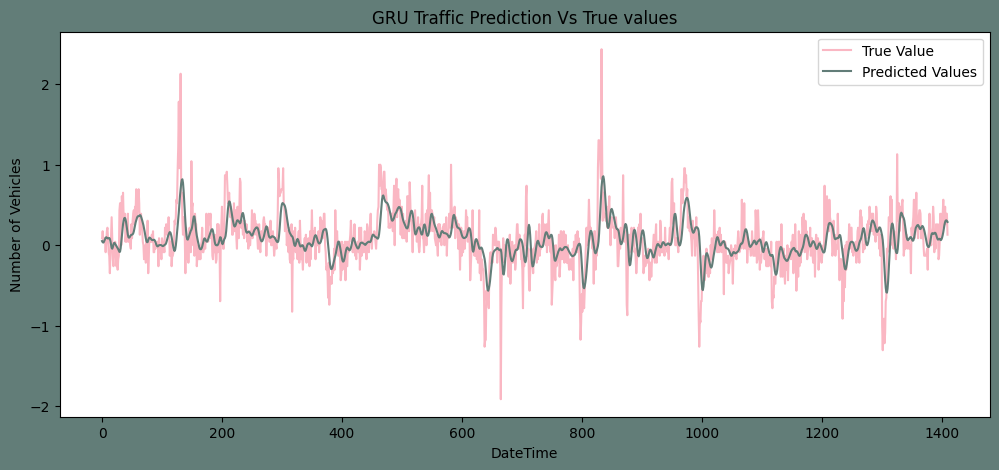

The root mean squared error is 0.2469013011251559.


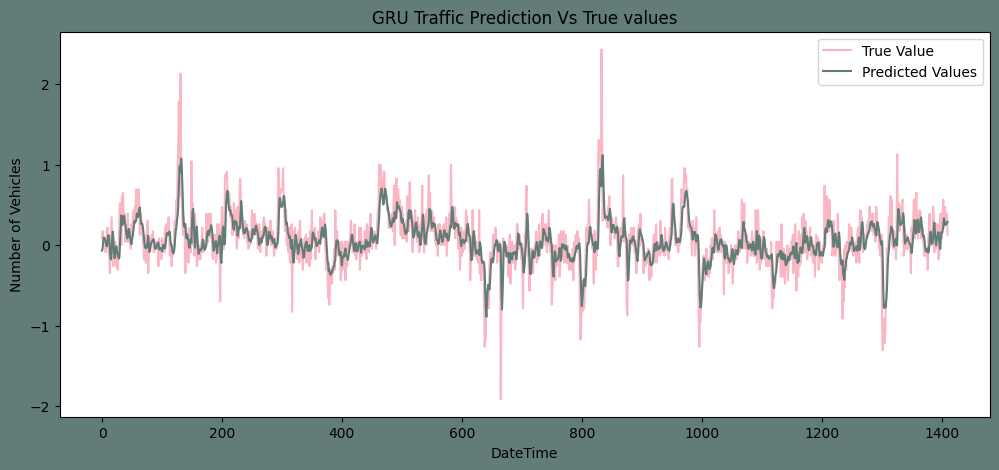

In [ ]:
RMSE_J1=RMSE_Value(y_testJ1,PredJ1)
PredictionsPlot(y_testJ1,PredJ1,0)

RMSE_J11=RMSE_Value(y_testJ1,PredJ11)
PredictionsPlot(y_testJ1,PredJ11,0)

In [ ]:
PredJ2 = LSTM_model(X_trainJ2,y_trainJ2,X_testJ2)
PredJ22 = GRU_model(X_trainJ2,y_trainJ2,X_testJ2)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.3004

88/88 [==============================] - 59s 481ms/step - loss: 0.3004
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.2650

88/88 [==============================] - 43s 485ms/step - loss: 0.2650
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.2468

88/88 [==============================] - 41s 471ms/step - loss: 0.2468
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.2395

88/88 [==============================] - 42s 483ms/step - loss: 0.2395
Epoch 5/50
88/88 [==============================] - ETA: 0s - loss: 0.2302

88/88 [==============================] - 41s 459ms/step - loss: 0.2302
Epoch 6/50
88/88 [==============================] - ETA: 0s - loss: 0.2257

88/88 [==============================] - 40s 452ms/step - loss: 0.2257
Epoch 7/50
88/88 [==============================] - ETA: 0s - loss: 0.2223

88/88 [==============================] - 41s 468ms/step - loss: 0.2223
Epoch 8/50
88/88 [==============================] - ETA: 0s - loss: 0.2220

88/88 [==============================] - 42s 473ms/step - loss: 0.2220
Epoch 9/50
88/88 [==============================] - ETA: 0s - loss: 0.2191

88/88 [==============================] - 43s 484ms/step - loss: 0.2191
Epoch 10/50
88/88 [==============================] - ETA: 0s - loss: 0.2169

88/88 [==============================] - 40s 452ms/step - loss: 0.2169
Epoch 11/50
88/88 [==============================] - ETA: 0s - loss: 0.2135

88/88 [==============================] - 40s 450ms/step - loss: 0.2135
Epoch 12/50
88/88 [==============================] - ETA: 0s - loss: 0.2135

88/88 [==============================] - 41s 467ms/step - loss: 0.2135
Epoch 13/50
88/88 [==============================] - ETA: 0s - loss: 0.2129

88/88 [==============================] - 40s 456ms/step - loss: 0.2129
Epoch 14/50
88/88 [==============================] - ETA: 0s - loss: 0.2102

88/88 [==============================] - 40s 454ms/step - loss: 0.2102
Epoch 15/50
88/88 [==============================] - ETA: 0s - loss: 0.2076

88/88 [==============================] - 41s 463ms/step - loss: 0.2076
Epoch 16/50
88/88 [==============================] - ETA: 0s - loss: 0.2060

88/88 [==============================] - 40s 455ms/step - loss: 0.2060
Epoch 17/50
88/88 [==============================] - ETA: 0s - loss: 0.2038

88/88 [==============================] - 40s 453ms/step - loss: 0.2038
Epoch 18/50
88/88 [==============================] - ETA: 0s - loss: 0.2033

88/88 [==============================] - 41s 468ms/step - loss: 0.2033
Epoch 19/50
88/88 [==============================] - ETA: 0s - loss: 0.2017

88/88 [==============================] - 40s 454ms/step - loss: 0.2017
Epoch 20/50
88/88 [==============================] - ETA: 0s - loss: 0.2006

88/88 [==============================] - 40s 454ms/step - loss: 0.2006
Epoch 21/50
88/88 [==============================] - ETA: 0s - loss: 0.1982

88/88 [==============================] - 41s 465ms/step - loss: 0.1982
Epoch 22/50
88/88 [==============================] - ETA: 0s - loss: 0.1989

88/88 [==============================] - 40s 455ms/step - loss: 0.1989
Epoch 23/50
88/88 [==============================] - ETA: 0s - loss: 0.1979

88/88 [==============================] - 41s 472ms/step - loss: 0.1979
Epoch 24/50
88/88 [==============================] - ETA: 0s - loss: 0.1957

88/88 [==============================] - 40s 456ms/step - loss: 0.1957
Epoch 25/50
88/88 [==============================] - ETA: 0s - loss: 0.1947

88/88 [==============================] - 40s 452ms/step - loss: 0.1947
Epoch 26/50
88/88 [==============================] - ETA: 0s - loss: 0.1945

88/88 [==============================] - 40s 453ms/step - loss: 0.1945
Epoch 27/50
88/88 [==============================] - ETA: 0s - loss: 0.1939

88/88 [==============================] - 40s 454ms/step - loss: 0.1939
Epoch 28/50
88/88 [==============================] - ETA: 0s - loss: 0.1936

88/88 [==============================] - 41s 460ms/step - loss: 0.1936
Epoch 29/50
88/88 [==============================] - ETA: 0s - loss: 0.1941

88/88 [==============================] - 41s 468ms/step - loss: 0.1941
Epoch 30/50
88/88 [==============================] - ETA: 0s - loss: 0.1911

88/88 [==============================] - 40s 454ms/step - loss: 0.1911
Epoch 31/50
88/88 [==============================] - ETA: 0s - loss: 0.1925

88/88 [==============================] - 40s 453ms/step - loss: 0.1925
Epoch 32/50
88/88 [==============================] - ETA: 0s - loss: 0.1916

88/88 [==============================] - 40s 452ms/step - loss: 0.1916
Epoch 33/50
88/88 [==============================] - ETA: 0s - loss: 0.1919

88/88 [==============================] - 40s 452ms/step - loss: 0.1919
Epoch 34/50
88/88 [==============================] - ETA: 0s - loss: 0.1906

88/88 [==============================] - 42s 481ms/step - loss: 0.1906
Epoch 35/50
88/88 [==============================] - ETA: 0s - loss: 0.1907

88/88 [==============================] - 40s 453ms/step - loss: 0.1907
Epoch 36/50
88/88 [==============================] - ETA: 0s - loss: 0.1895

88/88 [==============================] - 40s 455ms/step - loss: 0.1895
Epoch 37/50
88/88 [==============================] - ETA: 0s - loss: 0.1904

88/88 [==============================] - 40s 460ms/step - loss: 0.1904
Epoch 38/50
88/88 [==============================] - ETA: 0s - loss: 0.1876

88/88 [==============================] - 40s 460ms/step - loss: 0.1876
Epoch 39/50
88/88 [==============================] - ETA: 0s - loss: 0.1890

88/88 [==============================] - 40s 458ms/step - loss: 0.1890
Epoch 40/50
88/88 [==============================] - ETA: 0s - loss: 0.1876

88/88 [==============================] - 43s 487ms/step - loss: 0.1876
Epoch 41/50
88/88 [==============================] - ETA: 0s - loss: 0.1885

88/88 [==============================] - 40s 456ms/step - loss: 0.1885
Epoch 42/50
88/88 [==============================] - ETA: 0s - loss: 0.1889

88/88 [==============================] - 40s 457ms/step - loss: 0.1889
Epoch 43/50
88/88 [==============================] - ETA: 0s - loss: 0.1874

88/88 [==============================] - 40s 452ms/step - loss: 0.1874
Epoch 44/50
88/88 [==============================] - ETA: 0s - loss: 0.1870

88/88 [==============================] - 40s 453ms/step - loss: 0.1870
Epoch 45/50
88/88 [==============================] - ETA: 0s - loss: 0.1881

88/88 [==============================] - 40s 458ms/step - loss: 0.1881
Epoch 46/50
88/88 [==============================] - ETA: 0s - loss: 0.1858

88/88 [==============================] - 42s 473ms/step - loss: 0.1858
Epoch 47/50
88/88 [==============================] - ETA: 0s - loss: 0.1864

88/88 [==============================] - 41s 462ms/step - loss: 0.1864
Epoch 48/50
88/88 [==============================] - ETA: 0s - loss: 0.1870

88/88 [==============================] - 40s 453ms/step - loss: 0.1870
Epoch 49/50
88/88 [==============================] - ETA: 0s - loss: 0.1862

88/88 [==============================] - 40s 453ms/step - loss: 0.1862
Epoch 50/50
88/88 [==============================] - ETA: 0s - loss: 0.1889

45/45 [==============================] - 4s 55ms/step
Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.2316

88/88 [==============================] - 42s 371ms/step - loss: 0.2316
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.2044

88/88 [==============================] - 32s 358ms/step - loss: 0.2044
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.1970

88/88 [==============================] - 33s 374ms/step - loss: 0.1970
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.1934

88/88 [==============================] - 32s 367ms/step - loss: 0.1934
Epoch 5/50
88/88 [==============================] - ETA: 0s - loss: 0.1918

88/88 [==============================] - 32s 364ms/step - loss: 0.1918
Epoch 6/50
88/88 [==============================] - ETA: 0s - loss: 0.1926

88/88 [==============================] - 33s 378ms/step - loss: 0.1926
Epoch 7/50
88/88 [==============================] - ETA: 0s - loss: 0.1940

88/88 [==============================] - 33s 377ms/step - loss: 0.1940
Epoch 8/50
88/88 [==============================] - ETA: 0s - loss: 0.1912

88/88 [==============================] - 33s 375ms/step - loss: 0.1912
Epoch 9/50
88/88 [==============================] - ETA: 0s - loss: 0.1906

88/88 [==============================] - 32s 359ms/step - loss: 0.1906
Epoch 10/50
88/88 [==============================] - ETA: 0s - loss: 0.1889

88/88 [==============================] - 33s 374ms/step - loss: 0.1889
Epoch 11/50
88/88 [==============================] - ETA: 0s - loss: 0.1882

88/88 [==============================] - 32s 360ms/step - loss: 0.1882
Epoch 12/50
88/88 [==============================] - ETA: 0s - loss: 0.1887

88/88 [==============================] - 33s 375ms/step - loss: 0.1887
Epoch 13/50
88/88 [==============================] - ETA: 0s - loss: 0.1879

88/88 [==============================] - 32s 369ms/step - loss: 0.1879
Epoch 14/50
88/88 [==============================] - ETA: 0s - loss: 0.1871

88/88 [==============================] - 34s 380ms/step - loss: 0.1871
Epoch 15/50
88/88 [==============================] - ETA: 0s - loss: 0.1868

88/88 [==============================] - 33s 374ms/step - loss: 0.1868
Epoch 16/50
88/88 [==============================] - ETA: 0s - loss: 0.1868

88/88 [==============================] - 32s 360ms/step - loss: 0.1868
Epoch 17/50
11/88 [==>...........................] - ETA: 33s - loss: 0.1810

In [ ]:
RMSE_J2=RMSE_Value(y_testJ2,PredJ2)
PredictionsPlot(y_testJ2,PredJ2,1)

RMSE_J22=RMSE_Value(y_testJ2,PredJ22)
PredictionsPlot(y_testJ2,PredJ22,1)

In [ ]:
PredJ3 = LSTM_model(X_trainJ3,y_trainJ3,X_testJ3)
PredJ33 = GRU_model(X_trainJ3,y_trainJ3,X_testJ3)

In [ ]:
RMSE_J3=RMSE_Value(y_testJ3,PredJ3)
PredictionsPlot(y_testJ3,PredJ3,2)

RMSE_J33=RMSE_Value(y_testJ3,PredJ33)
PredictionsPlot(y_testJ3,PredJ33,2)

In [ ]:
PredJ4 = LSTM_model(X_trainJ4,y_trainJ4,X_testJ4)
PredJ44 = GRU_model(X_trainJ4,y_trainJ4,X_testJ4)

In [ ]:
RMSE_J4=RMSE_Value(y_testJ4,PredJ4)
PredictionsPlot(y_testJ4,PredJ4,3)

RMSE_J44=RMSE_Value(y_testJ4,PredJ44)
PredictionsPlot(y_testJ4,PredJ44,3)

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_Test is the actual values and pred_GRU is the predicted values
r2 = r2_score(y_testJ1,PredJ11 )
print("R^2 Score:", r2)


R^2 Score: 0.4767341286107666


In [ ]:
len(df)

48120

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/Comp_Datasets/Comp_traffic.csv')

In [ ]:
df1.head()